In [7]:
import scanpy as sc
import pandas as pd
import random
import numpy as np
import matplotlib as plt
import gc 
import ctypes
import scvi
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import gc 
import ctypes
import sccoda

In [11]:
!pip install tf_keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [12]:
# Setup
import importlib
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

import sccoda.datasets as scd

In [9]:
adata = sc.read_h5ad('../data/luca_query_reannotated.h5ad')

In [13]:
adata.obs

,sample,uicc_stage,ever_smoker,age,donor_id,origin,dataset,ann_fine,cell_type_predicted,doublet_status,...,IFN_TAMs,Reg_TAMs,Inflam_TAMs,LA_TAMs,Angio_TAMs,RTM_TAMs,Prolif_TAMs,Subtype,Projection_CellType,ident
001C_AAACCTGTCAACACCA-0,Adams_Kaminski_2020_001C,non-cancer,no,22.0,Adams_Kaminski_2020_001C,normal,Adams_Kaminski_2020,Macrophage alveolar,Macrophage,singlet,...,0.353933,0.571664,0.298638,0.541069,0.427279,0.565822,0.401695,Reg_TAMs,RTM_TAMs,local
001C_AAACGGGAGGCTCATT-0,Adams_Kaminski_2020_001C,non-cancer,no,22.0,Adams_Kaminski_2020_001C,normal,Adams_Kaminski_2020,Macrophage,Macrophage,singlet,...,0.477315,0.451494,0.370148,0.492239,0.537751,0.511095,0.348617,Angio_TAMs,LA_TAMs,local
001C_AAACGGGGTATAATGG-0,Adams_Kaminski_2020_001C,non-cancer,no,22.0,Adams_Kaminski_2020_001C,normal,Adams_Kaminski_2020,Macrophage alveolar,Macrophage,singlet,...,0.387389,0.497444,0.282365,0.403790,0.443018,0.548354,0.328568,RTM_TAMs,RTM_TAMs,local
001C_AAACGGGTCACAAACC-0,Adams_Kaminski_2020_001C,non-cancer,no,22.0,Adams_Kaminski_2020_001C,normal,Adams_Kaminski_2020,Macrophage,Macrophage,singlet,...,0.333177,0.592321,0.262999,0.594631,0.444907,0.450925,0.406192,LA_TAMs,LA_TAMs,local
001C_AAAGATGAGTGCTGCC-0,Adams_Kaminski_2020_001C,non-cancer,no,22.0,Adams_Kaminski_2020_001C,normal,Adams_Kaminski_2020,Macrophage alveolar,Macrophage,singlet,...,0.358754,0.648105,0.282604,0.482257,0.408499,0.454457,0.291259,Reg_TAMs,RTM_TAMs,local
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGCTGTCTA-1-38-8,Leader_Merad_2021_414,II,no,64.0,Leader_Merad_2021_729,tumor_primary,Leader_Merad_2021_10x_3p_v2_beads,Macrophage,NaN,singlet,...,0.551482,0.640531,0.489101,0.623875,0.525708,0.514441,0.527691,Reg_TAMs,IFN_TAMs,local
TTTGTCAAGGATATAC-1-38-8,Leader_Merad_2021_414,II,no,64.0,Leader_Merad_2021_729,tumor_primary,Leader_Merad_2021_10x_3p_v2_beads,Macrophage,NaN,singlet,...,0.492014,0.699073,0.539889,0.612688,0.608443,0.551273,0.460248,Reg_TAMs,Reg_TAMs,local
TTTGTCAAGTACGCGA-1-38-8,Leader_Merad_2021_414,II,no,64.0,Leader_Merad_2021_729,tumor_primary,Leader_Merad_2021_10x_3p_v2_beads,Macrophage,NaN,singlet,...,0.470449,0.588994,0.611164,0.427515,0.471975,0.431026,0.455491,Inflam_TAMs,Inflam_TAMs,local
TTTGTCACATCTATGG-1-38-8,Leader_Merad_2021_414,II,no,64.0,Leader_Merad_2021_729,tumor_primary,Leader_Merad_2021_10x_3p_v2_beads,Macrophage,NaN,singlet,...,0.515349,0.589936,0.633147,0.577088,0.550079,0.487074,0.425062,Inflam_TAMs,LA_TAMs,local


In [15]:
adata.obs.groupby("Projection_CellType").size()

Projection_CellType
Angio_TAMs      5741
IFN_TAMs       12215
Inflam_TAMs     6484
Int.Node.3      4221
Int.Node.4       922
Int.Node.5       150
LA_TAMs        32428
Prolif_TAMs     3771
RTM_TAMs       94074
Reg_TAMs       17933
dtype: int64

In [45]:
df = adata.obs[['sample', 'Projection_CellType']]

cell_counts = df.groupby(['sample', 'Projection_CellType']).size().reset_index(name='count')

count_matrix = cell_counts.pivot(index='sample', columns='Projection_CellType', values='count').fillna(0)

count_matrix = count_matrix.drop(columns=['Int.Node.3', 'Int.Node.4', 'Int.Node.5'])

print(count_matrix)

row_sums = count_matrix.sum(axis=1)

rows_below_50 = count_matrix.index[row_sums < 50]

df_cleaned = count_matrix.drop(index=rows_below_50)

print(df_cleaned)


Projection_CellType         Angio_TAMs  IFN_TAMs  Inflam_TAMs  LA_TAMs  \
sample                                                                   
Adams_Kaminski_2020_001C             5        10            3       81   
Adams_Kaminski_2020_002C             2         3            5      185   
Adams_Kaminski_2020_003C            10        51            4      283   
Adams_Kaminski_2020_8CO              0         0            0        0   
Adams_Kaminski_2020_022C-a           8        87            7      213   
...                                ...       ...          ...      ...   
Zilionis_Klein_2019_p5t2             8        10            5       97   
Zilionis_Klein_2019_p6t1            10         2            5       82   
Zilionis_Klein_2019_p6t2            13         3            2       72   
Zilionis_Klein_2019_p7t1            24         9            3      212   
Zilionis_Klein_2019_p7t2            30        13            3      301   

Projection_CellType         Prolif_TA

In [46]:
df_cleaned['sample'] = df_cleaned.index

#sample_stage[df_cleaned.index]

In [47]:
df_cleaned

Projection_CellType,Angio_TAMs,IFN_TAMs,Inflam_TAMs,LA_TAMs,Prolif_TAMs,RTM_TAMs,Reg_TAMs,sample
sample,,,,,,,,
Adams_Kaminski_2020_001C,5,10,3,81,9,439,32,Adams_Kaminski_2020_001C
Adams_Kaminski_2020_002C,2,3,5,185,3,105,30,Adams_Kaminski_2020_002C
Adams_Kaminski_2020_003C,10,51,4,283,15,920,116,Adams_Kaminski_2020_003C
Adams_Kaminski_2020_022C-a,8,87,7,213,9,857,85,Adams_Kaminski_2020_022C-a
Adams_Kaminski_2020_022C-b,9,77,6,203,5,730,79,Adams_Kaminski_2020_022C-b
...,...,...,...,...,...,...,...,...
Zilionis_Klein_2019_p5t2,8,10,5,97,10,1,31,Zilionis_Klein_2019_p5t2
Zilionis_Klein_2019_p6t1,10,2,5,82,1,12,67,Zilionis_Klein_2019_p6t1
Zilionis_Klein_2019_p6t2,13,3,2,72,3,7,52,Zilionis_Klein_2019_p6t2


In [51]:
data_all.obs.index.name = None
data_all.obs

Projection_CellType,sample
Adams_Kaminski_2020_001C,Adams_Kaminski_2020_001C
Adams_Kaminski_2020_002C,Adams_Kaminski_2020_002C
Adams_Kaminski_2020_003C,Adams_Kaminski_2020_003C
Adams_Kaminski_2020_022C-a,Adams_Kaminski_2020_022C-a
Adams_Kaminski_2020_022C-b,Adams_Kaminski_2020_022C-b
...,...
Zilionis_Klein_2019_p5t2,Zilionis_Klein_2019_p5t2
Zilionis_Klein_2019_p6t1,Zilionis_Klein_2019_p6t1
Zilionis_Klein_2019_p6t2,Zilionis_Klein_2019_p6t2
Zilionis_Klein_2019_p7t1,Zilionis_Klein_2019_p7t1


In [53]:
# 1. Build a mapping from sample to tumor_stage
sample_to_stage = adata.obs[['sample', 'tumor_stage']].drop_duplicates().set_index('sample')['tumor_stage']

# 2. Apply the mapping to data_all.obs
data_all.obs['tumor_stage'] = data_all.obs['sample'].map(sample_to_stage)

#data_all.obs = data_all.obs.merge(adata.obs[['sample', 'tumor_stage']], on='sample', how='left')



In [54]:
data_all.obs

Projection_CellType,sample,tumor_stage
Adams_Kaminski_2020_001C,Adams_Kaminski_2020_001C,non-cancer
Adams_Kaminski_2020_002C,Adams_Kaminski_2020_002C,non-cancer
Adams_Kaminski_2020_003C,Adams_Kaminski_2020_003C,non-cancer
Adams_Kaminski_2020_022C-a,Adams_Kaminski_2020_022C-a,non-cancer
Adams_Kaminski_2020_022C-b,Adams_Kaminski_2020_022C-b,non-cancer
...,...,...
Zilionis_Klein_2019_p5t2,Zilionis_Klein_2019_p5t2,advanced
Zilionis_Klein_2019_p6t1,Zilionis_Klein_2019_p6t1,early
Zilionis_Klein_2019_p6t2,Zilionis_Klein_2019_p6t2,early
Zilionis_Klein_2019_p7t1,Zilionis_Klein_2019_p7t1,advanced


In [55]:
data_all.obs['tumor_stage'].value_counts()

tumor_stage
early         147
non-cancer     79
advanced       76
Name: count, dtype: int64

In [56]:
data_cancer = data_all[data_all.obs["tumor_stage"].isin(["early", "advanced"])]
print(data_cancer.obs)

Projection_CellType                         sample tumor_stage
Chen_Zhang_2020_NSCLC-2    Chen_Zhang_2020_NSCLC-2       early
Chen_Zhang_2020_NSCLC-5    Chen_Zhang_2020_NSCLC-5    advanced
Chen_Zhang_2020_NSCLC-6    Chen_Zhang_2020_NSCLC-6       early
Chen_Zhang_2020_NSCLC-7    Chen_Zhang_2020_NSCLC-7       early
Chen_Zhang_2020_NSCLC-8    Chen_Zhang_2020_NSCLC-8    advanced
...                                            ...         ...
Zilionis_Klein_2019_p5t2  Zilionis_Klein_2019_p5t2    advanced
Zilionis_Klein_2019_p6t1  Zilionis_Klein_2019_p6t1       early
Zilionis_Klein_2019_p6t2  Zilionis_Klein_2019_p6t2       early
Zilionis_Klein_2019_p7t1  Zilionis_Klein_2019_p7t1    advanced
Zilionis_Klein_2019_p7t2  Zilionis_Klein_2019_p7t2    advanced

[223 rows x 2 columns]


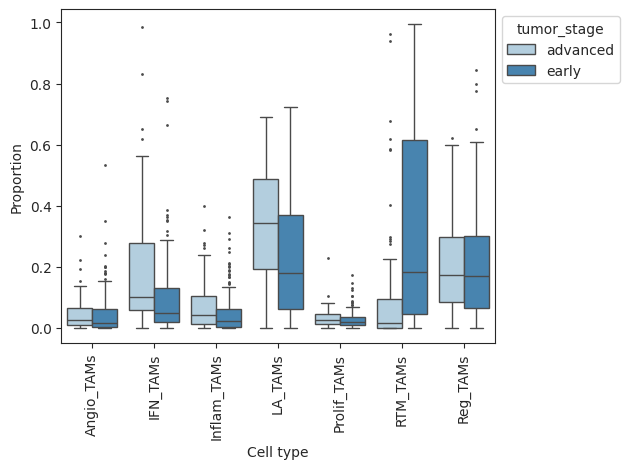

In [61]:
import matplotlib.pyplot as plt

# Generate the plot
viz.boxplots(data_cancer, feature_name="tumor_stage")

# Save as PDF in the 'figures/' folder
plt.savefig("../figures/tumor_stage_boxplot_sccoda.pdf", format="pdf", bbox_inches="tight")

# Show the plot
plt.show()


In [62]:
model_cancer = mod.CompositionalAnalysis(data_cancer, formula="tumor_stage", reference_cell_type="Prolif_TAMs")


Zero counts encountered in data! Added a pseudocount of 0.5.


I0000 00:00:1746311617.103465  253425 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14242 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:2d:00.0, compute capability: 8.6


In [64]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # disables GPU


In [67]:
sim_results = model_cancer.sample_hmc()



E0000 00:00:1746311895.655216  264813 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
E0000 00:00:1746311895.689304  264813 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
2025-05-04 01:38:15.747420: W tensorflow/core/framework/op_kernel.cc:1857] OP_REQUIRES failed at xla_ops.cc:591 : FAILED_PRECONDITION: DNN library initialization failed. Look at the e

FailedPreconditionError: Graph execution error:

Detected at node mcmc_sample_chain/reduced_kernel_bootstrap_results/simple_step_size_adaptation___init__/_bootstrap_results/transformed_kernel_bootstrap_results/mh_bootstrap_results/hmc_kernel_bootstrap_results/maybe_call_fn_and_grads/value_and_gradients/value_and_gradient/PartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/biolab/.local/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/biolab/.local/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/biolab/.local/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/biolab/.local/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/home/biolab/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/biolab/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/biolab/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/biolab/.local/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/biolab/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/biolab/.local/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/biolab/.local/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/biolab/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3077, in run_cell

  File "/home/biolab/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3132, in _run_cell

  File "/home/biolab/.local/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/biolab/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3336, in run_cell_async

  File "/home/biolab/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3519, in run_ast_nodes

  File "/home/biolab/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3579, in run_code

  File "/tmp/ipykernel_253425/102674845.py", line 1, in <module>

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/sccoda/model/scCODA_model.py", line 314, in sample_hmc

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/sccoda/model/scCODA_model.py", line 165, in sampling

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/sccoda/model/scCODA_model.py", line 155, in sample_mcmc

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/mcmc/sample.py", line 330, in sample_chain

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/experimental/mcmc/with_reductions.py", line 146, in bootstrap_results

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/mcmc/simple_step_size_adaptation.py", line 443, in bootstrap_results

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/mcmc/transformed_kernel.py", line 492, in bootstrap_results

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/mcmc/hmc.py", line 533, in bootstrap_results

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/mcmc/metropolis_hastings.py", line 273, in bootstrap_results

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/mcmc/hmc.py", line 741, in bootstrap_results

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/mcmc/internal/util.py", line 297, in maybe_call_fn_and_grads

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/mcmc/internal/util.py", line 265, in _value_and_gradients

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/math/gradient.py", line 108, in value_and_gradient

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/math/gradient.py", line 378, in _value_and_grad_impl

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/math/gradient.py", line 330, in _gradient_old

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/math/gradient.py", line 378, in <lambda>

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/math/gradient.py", line 375, in <lambda>

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/mcmc/transformed_kernel.py", line 123, in transformed_log_prob_fn

Detected at node mcmc_sample_chain/reduced_kernel_bootstrap_results/simple_step_size_adaptation___init__/_bootstrap_results/transformed_kernel_bootstrap_results/mh_bootstrap_results/hmc_kernel_bootstrap_results/maybe_call_fn_and_grads/value_and_gradients/value_and_gradient/PartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/biolab/.local/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/biolab/.local/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/biolab/.local/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/biolab/.local/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/home/biolab/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/biolab/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/biolab/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/biolab/.local/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/biolab/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/biolab/.local/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/biolab/.local/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/biolab/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3077, in run_cell

  File "/home/biolab/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3132, in _run_cell

  File "/home/biolab/.local/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/biolab/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3336, in run_cell_async

  File "/home/biolab/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3519, in run_ast_nodes

  File "/home/biolab/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3579, in run_code

  File "/tmp/ipykernel_253425/102674845.py", line 1, in <module>

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/sccoda/model/scCODA_model.py", line 314, in sample_hmc

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/sccoda/model/scCODA_model.py", line 165, in sampling

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/sccoda/model/scCODA_model.py", line 155, in sample_mcmc

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/mcmc/sample.py", line 330, in sample_chain

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/experimental/mcmc/with_reductions.py", line 146, in bootstrap_results

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/mcmc/simple_step_size_adaptation.py", line 443, in bootstrap_results

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/mcmc/transformed_kernel.py", line 492, in bootstrap_results

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/mcmc/hmc.py", line 533, in bootstrap_results

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/mcmc/metropolis_hastings.py", line 273, in bootstrap_results

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/mcmc/hmc.py", line 741, in bootstrap_results

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/mcmc/internal/util.py", line 297, in maybe_call_fn_and_grads

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/mcmc/internal/util.py", line 265, in _value_and_gradients

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/math/gradient.py", line 108, in value_and_gradient

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/math/gradient.py", line 378, in _value_and_grad_impl

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/math/gradient.py", line 330, in _gradient_old

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/math/gradient.py", line 378, in <lambda>

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/math/gradient.py", line 375, in <lambda>

  File "/home/biolab/.local/share/r-miniconda/lib/python3.11/site-packages/tensorflow_probability/python/mcmc/transformed_kernel.py", line 123, in transformed_log_prob_fn

2 root error(s) found.
  (0) FAILED_PRECONDITION:  DNN library initialization failed. Look at the errors above for more details.
	 [[{{node mcmc_sample_chain/reduced_kernel_bootstrap_results/simple_step_size_adaptation___init__/_bootstrap_results/transformed_kernel_bootstrap_results/mh_bootstrap_results/hmc_kernel_bootstrap_results/maybe_call_fn_and_grads/value_and_gradients/value_and_gradient/PartitionedCall}}]]
	 [[mcmc_sample_chain/trace_scan/while/body/_1/mcmc_sample_chain/trace_scan/while/smart_for_loop/while/body/_572/mcmc_sample_chain/trace_scan/while/smart_for_loop/while/reduced_kernel_one_step/EagerPyFunc/_59]]
  (1) FAILED_PRECONDITION:  DNN library initialization failed. Look at the errors above for more details.
	 [[{{node mcmc_sample_chain/reduced_kernel_bootstrap_results/simple_step_size_adaptation___init__/_bootstrap_results/transformed_kernel_bootstrap_results/mh_bootstrap_results/hmc_kernel_bootstrap_results/maybe_call_fn_and_grads/value_and_gradients/value_and_gradient/PartitionedCall}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_sample_mcmc_6372]

In [68]:
!conda install cudnn=9.3 -c nvidia


Error while loading conda entry point: conda-libmamba-solver (module 'libmambapy' has no attribute 'QueryFormat')

CondaValueError: You have chosen a non-default solver backend (libmamba) but it was not recognized. Choose one of: classic



In [69]:
!conda config --set solver classic


Error while loading conda entry point: conda-libmamba-solver (module 'libmambapy' has no attribute 'QueryFormat')
